<a href="https://colab.research.google.com/github/raghab007/Demo/blob/main/Copy_of_week4_RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets link: https://shorturl.at/G6eUk

This notebook's url: https://shorturl.at/LWU4g

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('marks.csv')
df.head(10)

study_time  Marks
0         600     90
1         550     88
2         500     85
3         450     77
4         400     71
5         350     67

In [4]:
df.shape

(6, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   study_time  6 non-null      int64
 1   Marks       6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


Text(0, 0.5, 'Marks')

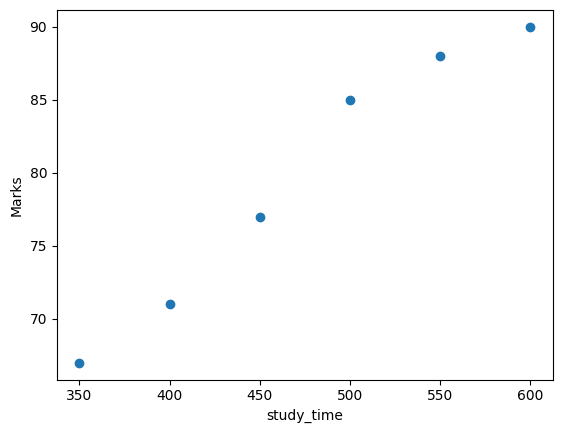

In [ ]:
plt.scatter(df.study_time,df.Marks)
plt.xlabel('study_time')
plt.ylabel('Marks')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
independent_variables = df['study_time'].values.reshape(-1,1)   # reshape for transforming 1D array into 2D array
dependent_variables = df['Marks']

In [ ]:
reg = LinearRegression() # initialize the model

In [ ]:
reg.fit(independent_variables,dependent_variables) # train the model

LinearRegression()

In [ ]:
reg.coef_   #this is m

array([0.09942857])

In [ ]:
reg.intercept_    #this is c

32.43809523809524

In [ ]:
new_study_time = 540
y_pred = reg.predict([[new_study_time]])
y_pred

array([86.12952381])

In [ ]:
# y = mx+c
0.09942857*540+32.43809523809524

86.12952303809524

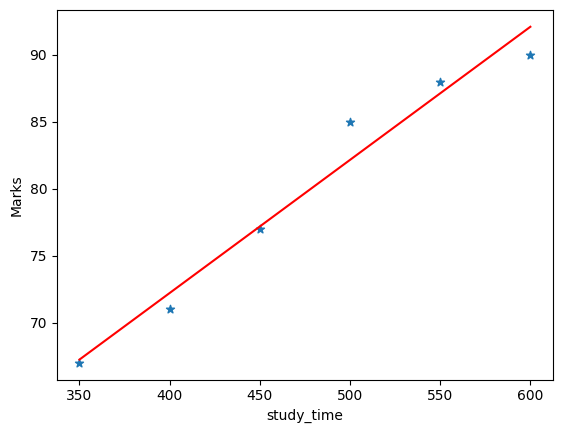

In [ ]:
plt.scatter(df.study_time,df.Marks, marker = '*')
plt.xlabel('study_time')
plt.ylabel('Marks')
plt.plot(df.study_time,reg.predict(independent_variables), color = 'red')

In [ ]:
# dataset: Student_Performance.csv focus on carrying the various details realted to the performance index
# the correlation will be interesting to check and decide the relations
# Note: This is just for the demnstration purpose. For Course work and Fyp's make sure to use the well
# correlated data

In [ ]:
df = pd.read_csv('Student_Performance.csv')

In [ ]:
df.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [ ]:
df.info() # shows information about each column in a given dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.corr(numeric_only=True) # correlation between each column

Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance Index                      0.373730         0.915189     0.048106   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.043268   

                                  Performance Index  
Hours Studied                              0.373730  
Previous Scores                            0.915189  
Sleep Hours                                0.048106  
Sample Question Papers Practiced           0.043268  
Performance Index                          1.000000

In [ ]:
from sklearn.model_selection import train_test_split

##### In the earlier example there was no train test split
##### In this case, we have selected only one feature for demo purpose
##### We guess this will generate some less score obviously

In [ ]:
independent_variables=df[['Hours Studied']]
dependent_variables=df['Performance Index']

In [ ]:
dependent_variables.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variables, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((8000, 1), (8000,))

In [ ]:
X_test.shape,y_test.shape

((2000, 1), (2000,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear=LinearRegression()

In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
slope = linear.coef_     # Slope (m)
intercept = linear.intercept_  # Intercept (c)
print(slope)
print(intercept)

[2.78430044]
41.436634826535744


In [ ]:
pred=linear.predict(X_test)

Loss Function!: There are multiple of loss functions to evaluate the performane of the regression based model.

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
print("Mean Squared Error value:",mse)
print("how much away from actual data",root)

Mean Squared Error value: 321.8145383172104
how much away from actual data 17.93919001285204


In [ ]:
# multiple

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
independent_variable=df.drop(columns=['Extracurricular Activities','Performance Index'])
dependent_variable=df['Performance Index']

In [ ]:
independent_variable.sample(5)

Hours Studied  Previous Scores  Sleep Hours  \
6065              5               79            9   
7115              5               54            8   
2106              3               85            7   
4404              5               94            8   
6564              7               64            6   

      Sample Question Papers Practiced  
6065                                 8  
7115                                 5  
2106                                 8  
4404                                 3  
6564                                 8

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 4)

In [ ]:
linear=LinearRegression()

In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

Since we have 4 independent variables, we will have 4 cofficients.

In [ ]:
linear.coef_

array([2.85289351, 1.01703572, 0.47331832, 0.19172629])

In [ ]:
linear.intercept_

-33.60206732749288

In [ ]:
pred=linear.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
print(mse)
print("how much away from actual data",root)
print(f"score is {linear.score(X_test,y_test)}")

321.8145383172104
how much away from actual data 17.93919001285204
score is 0.13160425385996788


In [ ]:
independent_variable.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [ ]:
hours_studied = 7
previous_scores = 88
sleep_hours = 9
sample_question = 8
predicted_value = linear.predict([[hours_studied, previous_scores, sleep_hours, sample_question]])
print(predicted_value)

[81.66100546]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# RIDGE REGRESSION and Lasso Regression

In [ ]:
df=pd.read_csv("Student_Performance.csv")
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.head(2)

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# x=df[['Hours Studied']]
# y=df['Performance Index']
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X=df.drop(columns=['Performance Index'])
y=df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
ridge=Ridge()
lasso=Lasso()
linear=LinearRegression()

In [ ]:
parameter={'alpha':[1,2,4,6,6.5,6.8,7,8,63.83,1.5,2]}

In [ ]:
ridgegrid=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgegrid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 4, 6, 6.5, 6.8, 7, 8, 63.83, 1.5, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
ridgegrid.best_params_

{'alpha': 8}

In [ ]:
ridgegrid.best_score_

-4.17894633288377

In [ ]:
pred=ridgegrid.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
print(mse)
print("how much away from actual data",root)

321.8145383172104
how much away from actual data 17.93919001285204


In [ ]:
lassogrid=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassogrid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 4, 6, 6.5, 6.8, 7, 8, 63.83, 1.5, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
lassogrid.best_params_

{'alpha': 1}

In [ ]:
ridgegrid.best_score_

-4.17894633288377

In [ ]:
pred=ridgegrid.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
print(mse)
print("how much away from actual data",root)

4.082709036182982 0.9889830733617943
how much away from actual data 2.020571462775564
